In [1]:
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = 'small/'
model_path = Path("/home/v-mezhang/blob/model/" + str(dataset))

In [5]:
policy = 'epsilon_greedy'
paras = [0, 0.1]
rewards = {}
opt_rewards = {}

In [6]:
for para in paras:
    policy_name = policy + '_' + str(para)
    with open(os.path.join(model_path, (policy_name + "_rewards.pkl")), "rb") as f:
        rewards[para] = pickle.load(f)
    with open(os.path.join(model_path, (policy_name+ "_opt_rewards.pkl")), "rb") as f:
        opt_rewards[para] = pickle.load(f)


In [7]:
cumu_regrets = {}
for para in paras:
    num_exper, num_sam = rewards[para].shape
    cumu_regrets[para] = np.zeros((num_exper, num_sam))
    for i in range(num_exper):
        cumu_reward = 0
        cumu_opt_reward = 0

        for j in range(num_sam):
            cumu_reward += rewards[para][i,j]
            cumu_opt_reward += opt_rewards[para][i,j]
            cumu_regrets[para][i,j] = (cumu_opt_reward - cumu_reward) #/(j+1)

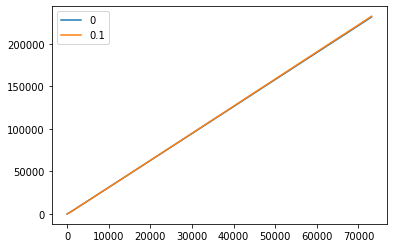

In [8]:
for para, value in cumu_regrets.items():
    plt.plot(range(num_sam), value.mean(axis=0), label = para)
plt.legend()


(array([17940., 16048., 16409.,  8784.,  6161.,  4708.,  1777.,  1038.,
          237.,    50.]),
 array([0.  , 0.34, 0.68, 1.02, 1.36, 1.7 , 2.04, 2.38, 2.72, 3.06, 3.4 ]),
 <BarContainer object of 10 artists>)

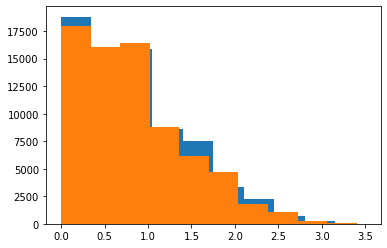

In [ ]:
# plt.hist(rewards.mean(axis = 0))
# plt.hist(e_rewards.mean(axis = 0))

(array([    0.,     0.,     0.,     0.,     0., 73152.,     0.,     0.,
            0.,     0.]),
 array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5]),
 <BarContainer object of 10 artists>)

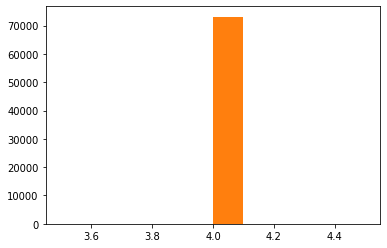

In [ ]:
# plt.hist(opt_rewards.mean(axis = 0))
# plt.hist(e_opt_rewards.mean(axis = 0))